In [1]:
# testing to see if we can get some data here
from pybaseball import lahman
import pandas as pd
import numpy as np

In [3]:
pitching_df = lahman.pitching()

In [6]:
hofer = pd.read_csv('../data/baseballdatabank/contrib/HallOfFame.csv')

In [9]:
# hofer[hofer.playerID== 'martide01']

,playerID,yearID,votedBy,ballots,needed,votes,inducted,category,needed_note
3714,martide01,2004,BBWAA,506.0,380.0,16.0,N,Player,NaN


In [10]:
hofer_players = hofer[(hofer.inducted == 'Y') & (hofer.category == 'Player')]

In [17]:
# join the pitchers and hofer bu joining the player IDs
# result = pd.merge(hofer_players, pitching_df, how='left', on=['playerID'])
result = pd.merge(hofer_players, pitching_df, how='right', on=['playerID'])

In [18]:
result.columns

Index(['playerID', 'yearID_x', 'votedBy', 'ballots', 'needed', 'votes',
       'inducted', 'category', 'needed_note', 'yearID_y', 'stint', 'teamID',
       'lgID', 'W', 'L', 'G', 'GS', 'CG', 'SHO', 'SV', 'IPouts', 'H', 'ER',
       'HR', 'BB', 'SO', 'BAOpp', 'ERA', 'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF',
       'R', 'SH', 'SF', 'GIDP'],
      dtype='object')

In [19]:
result.shape

(49430, 38)

In [20]:
result.head()

,playerID,yearID_x,votedBy,ballots,needed,votes,inducted,category,needed_note,yearID_y,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1871,...,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
1,brainas01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1871,...,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
2,fergubo01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1871,...,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN
3,fishech01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1871,...,NaN,20,NaN,0,1080.0,1,257,NaN,NaN,NaN
4,fleetfr01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1871,...,NaN,0,NaN,0,57.0,0,21,NaN,NaN,NaN


In [21]:
# hof_pitchers = result[pd.notnull(result.IPouts)]
pitchers_data = result[pd.notnull(result.IPouts)]

In [33]:
pitchers_data.columns

Index(['playerID', 'yearID_x', 'votedBy', 'ballots', 'needed', 'votes',
       'inducted', 'category', 'needed_note', 'yearID_y', 'stint', 'teamID',
       'lgID', 'W', 'L', 'G', 'GS', 'CG', 'SHO', 'SV', 'IPouts', 'H', 'ER',
       'HR', 'BB', 'SO', 'BAOpp', 'ERA', 'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF',
       'R', 'SH', 'SF', 'GIDP'],
      dtype='object')

In [35]:
# pitchers_data[pitchers_data.playerID=='martipe02']

,playerID,yearID_x,votedBy,ballots,needed,votes,inducted,category,needed_note,yearID_y,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
28582,martipe02,2015.0,BBWAA,549.0,412.0,500.0,Y,Player,NaN,1992,...,0.0,0,0.0,0,31.0,1,2,0.0,0.0,0.0
29101,martipe02,2015.0,BBWAA,549.0,412.0,500.0,Y,Player,NaN,1993,...,4.0,3,4.0,1,444.0,20,34,0.0,5.0,7.0
29616,martipe02,2015.0,BBWAA,549.0,412.0,500.0,Y,Player,NaN,1994,...,3.0,6,11.0,0,584.0,1,58,2.0,3.0,12.0
30171,martipe02,2015.0,BBWAA,549.0,412.0,500.0,Y,Player,NaN,1995,...,1.0,5,11.0,2,784.0,0,79,7.0,3.0,10.0
30763,martipe02,2015.0,BBWAA,549.0,412.0,500.0,Y,Player,NaN,1996,...,3.0,6,3.0,0,901.0,0,100,9.0,6.0,13.0
31370,martipe02,2015.0,BBWAA,549.0,412.0,500.0,Y,Player,NaN,1997,...,5.0,3,9.0,1,947.0,0,65,9.0,1.0,16.0
31952,martipe02,2015.0,BBWAA,549.0,412.0,500.0,Y,Player,NaN,1998,...,3.0,9,8.0,0,951.0,0,82,4.0,7.0,8.0
32581,martipe02,2015.0,BBWAA,549.0,412.0,500.0,Y,Player,NaN,1999,...,1.0,6,9.0,0,835.0,1,56,3.0,6.0,11.0
33234,martipe02,2015.0,BBWAA,549.0,412.0,500.0,Y,Player,NaN,2000,...,0.0,1,14.0,0,817.0,0,44,2.0,1.0,11.0
33910,martipe02,2015.0,BBWAA,549.0,412.0,500.0,Y,Player,NaN,2001,...,0.0,4,6.0,0,456.0,0,33,2.0,0.0,5.0


In [25]:
pitchers_data.tail()

,playerID,yearID_x,votedBy,ballots,needed,votes,inducted,category,needed_note,yearID_y,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
49425,zeuchtj01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,...,0.0,0,0.0,0,74.0,0,16,0.0,0.0,2.0
49426,zimmebr02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,...,0.0,0,2.0,1,285.0,0,37,1.0,2.0,3.0
49427,zimmejo02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,...,0.0,0,1.0,0,26.0,1,5,0.0,0.0,1.0
49428,zimmeky01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,...,1.0,9,0.0,0,223.0,9,32,0.0,4.0,13.0
49429,zuberty01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,...,1.0,2,1.0,0,123.0,6,20,0.0,1.0,2.0


In [26]:
pitchers_data.columns

Index(['playerID', 'yearID_x', 'votedBy', 'ballots', 'needed', 'votes',
       'inducted', 'category', 'needed_note', 'yearID_y', 'stint', 'teamID',
       'lgID', 'W', 'L', 'G', 'GS', 'CG', 'SHO', 'SV', 'IPouts', 'H', 'ER',
       'HR', 'BB', 'SO', 'BAOpp', 'ERA', 'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF',
       'R', 'SH', 'SF', 'GIDP'],
      dtype='object')

In [36]:
# Initialize dictionaries for player stats and years played
player_stats = {}
years_played = {}

In [38]:
# for i, row in hof_pitchers.iterrows():
for i, row in pitchers_data.iterrows():
    playerID = row['playerID']
    if playerID in player_stats:
        player_stats[playerID]['W'] = player_stats[playerID]['W'] + row['W']
        player_stats[playerID]['L'] = player_stats[playerID]['L'] + row['L']
        player_stats[playerID]['G'] = player_stats[playerID]['G'] + row['G']
        player_stats[playerID]['GS'] = player_stats[playerID]['GS'] + row['GS']
        player_stats[playerID]['CG'] = player_stats[playerID]['CG'] + row['CG']
        player_stats[playerID]['SV'] = player_stats[playerID]['SV'] + row['SV']
        player_stats[playerID]['IPouts'] = player_stats[playerID]['IPouts'] + row['IPouts']
        player_stats[playerID]['H'] = player_stats[playerID]['H'] + row['H']
        player_stats[playerID]['ER'] = player_stats[playerID]['ER'] + row['ER']
        player_stats[playerID]['HR'] = player_stats[playerID]['HR'] + row['HR']
        player_stats[playerID]['BB'] = player_stats[playerID]['BB'] + row['BB']
        player_stats[playerID]['SO'] = player_stats[playerID]['SO'] + row['SO']
        player_stats[playerID]['BAOpp'] = player_stats[playerID]['BAOpp'] + row['BAOpp']
        player_stats[playerID]['IBB'] = player_stats[playerID]['IBB'] + row['IBB']
        player_stats[playerID]['WP'] = player_stats[playerID]['WP'] + row['WP']
        player_stats[playerID]['HBP'] = player_stats[playerID]['HBP'] + row['HBP']
        player_stats[playerID]['BK'] = player_stats[playerID]['BK'] + row['BK']
        player_stats[playerID]['BFP'] = player_stats[playerID]['BFP'] + row['BFP']
        player_stats[playerID]['GF'] = player_stats[playerID]['GF'] + row['GF']
        player_stats[playerID]['R'] = player_stats[playerID]['R'] + row['R']
        player_stats[playerID]['SH'] = player_stats[playerID]['SH'] + row['SH']
        player_stats[playerID]['SF'] = player_stats[playerID]['SF'] + row['SF']
        player_stats[playerID]['GIDP'] = player_stats[playerID]['GIDP'] + row['GIDP']
        years_played[playerID].append(row['yearID_y'])
    else:
        player_stats[playerID] = {}
        player_stats[playerID]['W'] = row['W']
        player_stats[playerID]['L'] = row['L']
        player_stats[playerID]['G'] = row['G']
        player_stats[playerID]['GS'] = row['GS']
        player_stats[playerID]['CG'] = row['CG']
        player_stats[playerID]['SV'] = row['SV']
        player_stats[playerID]['IPouts'] = row['IPouts']
        player_stats[playerID]['H'] = row['H']
        player_stats[playerID]['ER'] = row['ER']
        player_stats[playerID]['HR'] = row['HR']
        player_stats[playerID]['BB'] = row['BB']
        player_stats[playerID]['SO'] = row['SO']
        player_stats[playerID]['BAOpp'] = row['BAOpp']
        player_stats[playerID]['IBB'] = row['IBB']
        player_stats[playerID]['WP'] = row['WP']
        player_stats[playerID]['HBP'] = row['HBP']
        player_stats[playerID]['BK'] = row['BK']
        player_stats[playerID]['BFP'] = row['BFP']
        player_stats[playerID]['GF'] = row['GF']
        player_stats[playerID]['R'] = row['R']
        player_stats[playerID]['SH'] = row['SH']
        player_stats[playerID]['SF'] = row['SF']
        player_stats[playerID]['GIDP'] = row['GIDP']
        years_played[playerID] = []
        years_played[playerID].append(row['yearID_y'])

In [153]:
# years_played

In [39]:
for k, v in years_played.items():
    player_stats[k]['Years_Played'] = len(list(set(v)))

In [40]:
for i, row in hofer_players.iterrows():
    playerID = row['playerID']
    if playerID in player_stats:
        player_stats[playerID]['HoF'] = 1
        player_stats[playerID]['votedBy'] = row['votedBy']

In [57]:
stats_df = pd.DataFrame.from_dict(player_stats, orient='index').reset_index()

In [58]:
stats_df.columns

Index(['index', 'W', 'L', 'G', 'GS', 'CG', 'SV', 'IPouts', 'H', 'ER', 'HR',
       'BB', 'SO', 'BAOpp', 'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF', 'R', 'SH',
       'SF', 'GIDP', 'Years_Played', 'HoF', 'votedBy'],
      dtype='object')

In [47]:
# stats_df = stats_df.reset_index()

In [59]:
stats_df['HoF'] = stats_df['HoF'].fillna(0)

In [60]:
stats_df = stats_df.rename(columns={'index':'playerID'})


In [65]:
stats_df.to_csv('../data/all_pitchers_and_hof.csv')

In [66]:
stats_df[stats_df.playerID == 'martide01']

,playerID,W,L,G,GS,CG,SV,IPouts,H,ER,...,BK,BFP,GF,R,SH,SF,GIDP,Years_Played,HoF,votedBy
5116,martide01,245,193,692,562,122,8,11999,3897,1643,...,30,16754.0,51,1835,120.0,109.0,332.0,23,0.0,NaN


In [143]:
people_df = lahman.people()

In [144]:
people_df.columns

Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast',
       'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame',
       'retroID', 'bbrefID'],
      dtype='object')

In [171]:
print(f"{pd.DatetimeIndex(people_df[people_df.playerID == 'martide01'].debut).year[0]} - {pd.DatetimeIndex(people_df[people_df.playerID == 'martide01'].finalGame).year[0]}")  
# pd.to_datetime(people_df[people_df.playerID == 'martide01'].debut).dt.year

1976 - 1998


In [315]:
print(people_df[(people_df.nameFirst == 'Jack')&(people_df.nameLast == 'Morris')])
# returns id martide01

        playerID  birthYear  birthMonth  birthDay birthCountry birthState  \
12905  morrija02     1955.0         5.0      16.0          USA         MN   

      birthCity  deathYear  deathMonth  deathDay deathCountry deathState  \
12905  St. Paul        NaN         NaN       NaN          NaN        NaN   

      deathCity nameFirst nameLast   nameGiven  weight  height bats throws  \
12905       NaN      Jack   Morris  John Scott   195.0    75.0    R      R   

            debut   finalGame   retroID    bbrefID  
12905  1977-07-26  1994-08-07  morrj001  morrija02  


In [34]:
people_df[(people_df.nameFirst == 'Pedro')&(people_df.nameLast == 'Martinez')]


,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
11524,martipe02,1971.0,10.0,25.0,D.R.,Distrito Nacional,Manoguayabo,NaN,NaN,NaN,...,Martinez,Pedro Jaime,170.0,71.0,R,R,1992-09-24,2009-09-30,martp001,martipe02
11525,martipe03,1968.0,11.0,29.0,D.R.,Santo Domingo,Villa Mella,NaN,NaN,NaN,...,Martinez,Pedro,155.0,74.0,L,L,1993-06-29,1997-09-06,martp002,martipe03


In [30]:
# per season statistics
dennis_martinez_stats = pitching_df[pitching_df.playerID == 'martide01']

In [31]:
dennis_martinez_stats.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'W', 'L', 'G', 'GS',
       'CG', 'SHO', 'SV', 'IPouts', 'H', 'ER', 'HR', 'BB', 'SO', 'BAOpp',
       'ERA', 'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF', 'R', 'SH', 'SF', 'GIDP'],
      dtype='object')

In [32]:
# lets's now sum up this player id
dennis_martinez_stats[['playerID','W', 'L', 'G', 'GS', 'CG', 'SV', 'IPouts', 'H', 'ER', 'HR', 'BB', 'SO',
       'BAOpp', 'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF', 'R', 'SH', 'SF', 'GIDP']]

,playerID,W,L,G,GS,CG,SV,IPouts,H,ER,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
21619,martide01,1,2,4,2,1,0,83,23,8,...,0.0,1,0.0,0,106.0,1,8,1.0,0.0,3.0
21999,martide01,14,7,42,13,5,4,500,157,76,...,5.0,5,8.0,0,709.0,19,86,8.0,8.0,20.0
22393,martide01,16,11,40,38,15,0,829,257,108,...,4.0,8,3.0,0,1140.0,0,121,8.0,7.0,32.0
22796,martide01,15,16,40,39,18,0,877,279,119,...,1.0,9,1.0,2,1206.0,0,129,12.0,12.0,24.0
23211,martide01,6,4,25,12,2,1,299,103,44,...,6.0,0,2.0,1,428.0,8,44,1.0,3.0,15.0
23587,martide01,14,5,25,24,9,0,537,173,66,...,1.0,6,2.0,1,753.0,0,84,2.0,5.0,14.0
23981,martide01,16,12,40,39,10,0,756,262,118,...,2.0,7,7.0,1,1093.0,0,123,11.0,7.0,13.0
24389,martide01,7,16,32,25,4,0,459,209,94,...,0.0,2,2.0,0,688.0,3,108,3.0,5.0,25.0
24794,martide01,6,9,34,20,2,0,425,145,79,...,2.0,7,5.0,0,599.0,4,81,0.0,5.0,11.0
25225,martide01,13,11,33,31,3,0,540,203,103,...,3.0,4,9.0,1,789.0,1,110,0.0,11.0,14.0


In [157]:
for i, row in dennis_martinez_stats.iterrows():
    playerID = row['playerID']
    if playerID in player_stats:
        player_stats[playerID]['W'] = player_stats[playerID]['W'] + row['W']
        player_stats[playerID]['L'] = player_stats[playerID]['L'] + row['L']
        player_stats[playerID]['G'] = player_stats[playerID]['G'] + row['G']
        player_stats[playerID]['GS'] = player_stats[playerID]['GS'] + row['GS']
        player_stats[playerID]['CG'] = player_stats[playerID]['CG'] + row['CG']
        player_stats[playerID]['SV'] = player_stats[playerID]['SV'] + row['SV']
        player_stats[playerID]['IPouts'] = player_stats[playerID]['IPouts'] + row['IPouts']
        player_stats[playerID]['H'] = player_stats[playerID]['H'] + row['H']
        player_stats[playerID]['ER'] = player_stats[playerID]['ER'] + row['ER']
        player_stats[playerID]['HR'] = player_stats[playerID]['HR'] + row['HR']
        player_stats[playerID]['BB'] = player_stats[playerID]['BB'] + row['BB']
        player_stats[playerID]['SO'] = player_stats[playerID]['SO'] + row['SO']
        player_stats[playerID]['BAOpp'] = player_stats[playerID]['BAOpp'] + row['BAOpp']
        player_stats[playerID]['IBB'] = player_stats[playerID]['IBB'] + row['IBB']
        player_stats[playerID]['WP'] = player_stats[playerID]['WP'] + row['WP']
        player_stats[playerID]['HBP'] = player_stats[playerID]['HBP'] + row['HBP']
        player_stats[playerID]['BK'] = player_stats[playerID]['BK'] + row['BK']
        player_stats[playerID]['BFP'] = player_stats[playerID]['BFP'] + row['BFP']
        player_stats[playerID]['GF'] = player_stats[playerID]['GF'] + row['GF']
        player_stats[playerID]['R'] = player_stats[playerID]['R'] + row['R']
        player_stats[playerID]['SH'] = player_stats[playerID]['SH'] + row['SH']
        player_stats[playerID]['SF'] = player_stats[playerID]['SF'] + row['SF']
        player_stats[playerID]['GIDP'] = player_stats[playerID]['GIDP'] + row['GIDP']
        years_played[playerID].append(row['yearID'])
    else:
        player_stats[playerID] = {}
        player_stats[playerID]['W'] = row['W']
        player_stats[playerID]['L'] = row['L']
        player_stats[playerID]['G'] = row['G']
        player_stats[playerID]['GS'] = row['GS']
        player_stats[playerID]['CG'] = row['CG']
        player_stats[playerID]['SV'] = row['SV']
        player_stats[playerID]['IPouts'] = row['IPouts']
        player_stats[playerID]['H'] = row['H']
        player_stats[playerID]['ER'] = row['ER']
        player_stats[playerID]['HR'] = row['HR']
        player_stats[playerID]['BB'] = row['BB']
        player_stats[playerID]['SO'] = row['SO']
        player_stats[playerID]['BAOpp'] = row['BAOpp']
        player_stats[playerID]['IBB'] = row['IBB']
        player_stats[playerID]['WP'] = row['WP']
        player_stats[playerID]['HBP'] = row['HBP']
        player_stats[playerID]['BK'] = row['BK']
        player_stats[playerID]['BFP'] = row['BFP']
        player_stats[playerID]['GF'] = row['GF']
        player_stats[playerID]['R'] = row['R']
        player_stats[playerID]['SH'] = row['SH']
        player_stats[playerID]['SF'] = row['SF']
        player_stats[playerID]['GIDP'] = row['GIDP']
        years_played[playerID] = []
        years_played[playerID].append(row['yearID'])

In [158]:
for i, row in hofer_players.iterrows():
    playerID = 'martide01'
    if playerID in player_stats:
        player_stats[playerID]['HoF'] = 0
        player_stats[playerID]['votedBy'] = None

In [159]:
for k, v in years_played.items():
    player_stats[k]['Years_Played'] = len(list(set(v)))

In [171]:
stats_df = pd.DataFrame.from_dict(player_stats, orient='index').reset_index()

In [174]:
stats_df=stats_df.rename(columns={'index':'playerID'})

In [175]:
stats_df

,playerID,W,L,G,GS,CG,SV,IPouts,H,ER,...,BK,BFP,GF,R,SH,SF,GIDP,Years_Played,HoF,votedBy
0,cobbty01,0.0,0.0,3.0,0.0,0.0,1.0,15.0,6.0,2.0,...,0.0,20.0,2.0,2.0,NaN,NaN,NaN,2,1,BBWAA
1,ruthba01,94.0,46.0,163.0,148.0,107.0,4.0,3664.0,974.0,309.0,...,4.0,5006.0,11.0,398.0,NaN,NaN,NaN,10,1,BBWAA
2,wagneho01,0.0,0.0,2.0,0.0,0.0,0.0,25.0,7.0,0.0,...,0.0,37.0,2.0,5.0,NaN,NaN,NaN,2,1,BBWAA
3,mathech01,373.0,188.0,636.0,552.0,435.0,29.0,14366.0,4219.0,1135.0,...,8.0,18943.0,73.0,1620.0,NaN,NaN,NaN,17,1,BBWAA
4,johnswa01,417.0,279.0,802.0,666.0,531.0,34.0,17744.0,4913.0,1424.0,...,4.0,23642.0,129.0,1902.0,NaN,NaN,NaN,21,1,BBWAA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,martipe02,219.0,100.0,476.0,409.0,46.0,3.0,8482.0,2221.0,919.0,...,6.0,11394.0,23.0,1006.0,74.0,63.0,148.0,18,1,BBWAA
93,smoltjo01,213.0,155.0,723.0,481.0,53.0,154.0,10419.0,3074.0,1284.0,...,16.0,14271.0,204.0,1391.0,139.0,87.0,244.0,21,1,BBWAA
94,hoffmtr01,61.0,75.0,1035.0,0.0,0.0,601.0,3268.0,846.0,347.0,...,0.0,4388.0,856.0,378.0,32.0,30.0,60.0,18,1,BBWAA
95,morrija02,254.0,186.0,549.0,527.0,175.0,0.0,11472.0,3567.0,1657.0,...,27.0,16120.0,10.0,1815.0,113.0,114.0,299.0,18,1,Veterans


In [176]:
pitcher_stats = stats_df[stats_df.Years_Played > 10]

In [177]:
pitcher_stats.to_csv('hall_of_fame_pitcher_stats_with_dmartinez.csv')

In [12]:
dennis_martinez_stats.groupby('playerID').W.sum()

playerID
martide01    245
Name: W, dtype: int64

In [18]:
dennis_martinez_stats['IP'] = dennis_martinez_stats.IPouts/3

/var/folders/kv/p5t_m_2511q50z7hfnpz3sk80000gn/T/ipykernel_40412/2684060669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dennis_martinez_stats['IP'] = dennis_martinez_stats.IPouts/3


# How can we determine if a player is a HOF?
We can look at the overall stats for each player in the HOF and compare with said player

In [178]:
pitching_hof_overall_stats = pd.read_csv('hall_of_fame_pitcher_stats_with_dmartinez.csv')

In [184]:
# pitching_hof_overall_stats= pitching_hof_overall_stats.drop('Unnamed: 0', axis=1)
pitching_hof_overall_stats

,playerID,W,L,G,GS,CG,SV,IPouts,H,ER,...,BK,BFP,GF,R,SH,SF,GIDP,Years_Played,HoF,votedBy
0,mathech01,373.0,188.0,636.0,552.0,435.0,29.0,14366.0,4219.0,1135.0,...,8.0,18943.0,73.0,1620.0,NaN,NaN,NaN,17,1,BBWAA
1,johnswa01,417.0,279.0,802.0,666.0,531.0,34.0,17744.0,4913.0,1424.0,...,4.0,23642.0,129.0,1902.0,NaN,NaN,NaN,21,1,BBWAA
2,youngcy01,511.0,315.0,906.0,815.0,749.0,18.0,22068.0,7092.0,2147.0,...,3.0,29579.0,84.0,3167.0,NaN,NaN,NaN,22,1,BBWAA
3,alexape01,373.0,208.0,696.0,599.0,437.0,32.0,15570.0,4868.0,1476.0,...,1.0,20928.0,80.0,1851.0,NaN,NaN,NaN,20,1,BBWAA
4,radboch01,310.0,194.0,527.0,502.0,488.0,2.0,13582.0,4328.0,1347.0,...,0.0,18918.0,24.0,2273.0,NaN,NaN,NaN,11,1,Old Timers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,martipe02,219.0,100.0,476.0,409.0,46.0,3.0,8482.0,2221.0,919.0,...,6.0,11394.0,23.0,1006.0,74.0,63.0,148.0,18,1,BBWAA
64,smoltjo01,213.0,155.0,723.0,481.0,53.0,154.0,10419.0,3074.0,1284.0,...,16.0,14271.0,204.0,1391.0,139.0,87.0,244.0,21,1,BBWAA
65,hoffmtr01,61.0,75.0,1035.0,0.0,0.0,601.0,3268.0,846.0,347.0,...,0.0,4388.0,856.0,378.0,32.0,30.0,60.0,18,1,BBWAA
66,morrija02,254.0,186.0,549.0,527.0,175.0,0.0,11472.0,3567.0,1657.0,...,27.0,16120.0,10.0,1815.0,113.0,114.0,299.0,18,1,Veterans


In [227]:
pitching_hof_overall_stats[pitching_hof_overall_stats.playerID == 'marquru01']

,playerID,W,L,G,GS,CG,SV,IPouts,H,ER,...,GF,R,SH,SF,GIDP,Years_Played,HoF,votedBy,IP,ERA
30,marquru01,201.0,177.0,536.0,404.0,197.0,19.0,9920.0,3233.0,1130.0,...,82.0,1443.0,NaN,NaN,NaN,18,1,Veterans,3306.666667,3.075605


In [185]:
pitching_hof_overall_stats['IP'] = pitching_hof_overall_stats['IPouts']/3

In [186]:
pitching_hof_overall_stats.tail()

,playerID,W,L,G,GS,CG,SV,IPouts,H,ER,...,BFP,GF,R,SH,SF,GIDP,Years_Played,HoF,votedBy,IP
63,martipe02,219.0,100.0,476.0,409.0,46.0,3.0,8482.0,2221.0,919.0,...,11394.0,23.0,1006.0,74.0,63.0,148.0,18,1,BBWAA,2827.333333
64,smoltjo01,213.0,155.0,723.0,481.0,53.0,154.0,10419.0,3074.0,1284.0,...,14271.0,204.0,1391.0,139.0,87.0,244.0,21,1,BBWAA,3473.000000
65,hoffmtr01,61.0,75.0,1035.0,0.0,0.0,601.0,3268.0,846.0,347.0,...,4388.0,856.0,378.0,32.0,30.0,60.0,18,1,BBWAA,1089.333333
66,morrija02,254.0,186.0,549.0,527.0,175.0,0.0,11472.0,3567.0,1657.0,...,16120.0,10.0,1815.0,113.0,114.0,299.0,18,1,Veterans,3824.000000
67,martide01,245.0,193.0,692.0,562.0,122.0,8.0,11999.0,3897.0,1643.0,...,16754.0,51.0,1835.0,120.0,109.0,332.0,23,0,NaN,3999.666667


In [189]:
pitching_hof_overall_stats['ERA'] = (9*pitching_hof_overall_stats.ER)/pitching_hof_overall_stats.IP

In [190]:
pitching_hof_overall_stats.tail()

,playerID,W,L,G,GS,CG,SV,IPouts,H,ER,...,GF,R,SH,SF,GIDP,Years_Played,HoF,votedBy,IP,ERA
63,martipe02,219.0,100.0,476.0,409.0,46.0,3.0,8482.0,2221.0,919.0,...,23.0,1006.0,74.0,63.0,148.0,18,1,BBWAA,2827.333333,2.925371
64,smoltjo01,213.0,155.0,723.0,481.0,53.0,154.0,10419.0,3074.0,1284.0,...,204.0,1391.0,139.0,87.0,244.0,21,1,BBWAA,3473.000000,3.327383
65,hoffmtr01,61.0,75.0,1035.0,0.0,0.0,601.0,3268.0,846.0,347.0,...,856.0,378.0,32.0,30.0,60.0,18,1,BBWAA,1089.333333,2.866891
66,morrija02,254.0,186.0,549.0,527.0,175.0,0.0,11472.0,3567.0,1657.0,...,10.0,1815.0,113.0,114.0,299.0,18,1,Veterans,3824.000000,3.899843
67,martide01,245.0,193.0,692.0,562.0,122.0,8.0,11999.0,3897.0,1643.0,...,51.0,1835.0,120.0,109.0,332.0,23,0,NaN,3999.666667,3.697058


In [ ]:
# investigate how many 20 game wins these players have had, need to be aware of Starting pitchers vs relievers
# we can run an analysis on how the numebers look like
#

In [213]:
set(pitching_hof_overall_stats.playerID.unique())

{'alexape01',
 'bendech01',
 'blylebe01',
 'brownmo01',
 'bunniji01',
 'carltst01',
 'chesbja01',
 'clarkjo01',
 'covelst01',
 'deandi01',
 'drysddo01',
 'eckerde01',
 'faberre01',
 'fellebo01',
 'fingero01',
 'fordwh01',
 'galvipu01',
 'gibsobo01',
 'glavito02',
 'gomezle01',
 'gossari01',
 'griffcl01',
 'grimebu01',
 'grovele01',
 'haineje01',
 'hoffmtr01',
 'hoytwa01',
 'hubbeca01',
 'hunteca01',
 'jenkife01',
 'johnsra05',
 'johnswa01',
 'keefeti01',
 'koufasa01',
 'lemonbo01',
 'lyonste01',
 'maddugr01',
 'maricju01',
 'marquru01',
 'martide01',
 'martipe02',
 'mathech01',
 'morrija02',
 'newhoha01',
 'nichoki01',
 'niekrph01',
 'palmeji01',
 'pennohe01',
 'perryga01',
 'planked01',
 'radboch01',
 'rixeyep01',
 'roberro01',
 'ruffire01',
 'ryanno01',
 'seaveto01',
 'smoltjo01',
 'spahnwa01',
 'suttebr01',
 'suttodo01',
 'vanceda01',
 'wadderu01',
 'walshed01',
 'welchmi01',
 'wilheho01',
 'willivi01',
 'wynnea01',
 'youngcy01'}

In [165]:
from pybaseball import bwar_pitch

# get war stats from baseball reference 
data = bwar_pitch()

# get war stats plus additional fields from this table 
data = bwar_pitch(return_all=True)

In [166]:
# test_data = data[data.player_ID.isin(set(pitching_hof_overall_stats.playerID.unique()))]
test_data = data[data.player_ID.isin(set(stats_df.playerID.unique()))]

In [167]:
player_war_stats={}

In [168]:
for player_id, war in test_data.groupby('player_ID').sum()['WAR'].items():
    playerID = player_id
    player_war_stats[playerID] = war

In [169]:
war_df = pd.DataFrame.from_dict(player_war_stats, orient='index').reset_index()
war_df = war_df.rename(columns={'index':'playerID', 0: 'WAR'})
war_df.head()

,playerID,WAR
0,aardsda01,1.85
1,aasedo01,15.09
2,abadfe01,3.18
3,abbeybe01,1.32
4,abbeych01,-0.09


In [170]:
stats_df_war = pd.merge(stats_df, war_df, how='left', on=['playerID'])

In [172]:
stats_df_war.to_csv('../data/all_pitcher_stats_with_WAR.csv')

In [240]:
pitching_hof_overall_stats_war.to_csv('hall_of_fame_pitcher_stats_with_dmartinez_WAR.csv')

In [4]:
stats_df_war = pd.read_csv('../data/all_pitcher_stats_with_WAR.csv')
pitching_hof_overall_stats_war = pd.read_csv('../data/hall_of_fame_pitcher_stats_with_dmartinez_WAR.csv')

stats_df_war = stats_df_war.drop('Unnamed: 0', axis=1)
pitching_hof_overall_stats_war = pitching_hof_overall_stats_war.drop('Unnamed: 0', axis=1)

In [173]:
# stats_df_war[stats_df_war.playerID=='martide01']

,playerID,W,L,G,GS,CG,SV,IPouts,H,ER,HR,BB,SO,BAOpp,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,Years_Played,HoF,votedBy,WAR
5116,martide01,245,193,692,562,122,8,11999,3897,1643,372,1165,2149,6.353,71.0,83,122.0,30,16754.0,51,1835,120.0,109.0,332.0,23,0.0,NaN,49.26


In [67]:
# cluster analysis
# stats_df = pd.read_csv('../data/all_pitchers_and_hof.csv')

In [6]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [227]:
stats_df_war_greater_than_13_eligible.to_csv('../data/all_pitcher_stats_with_WAR_eligible.csv')

In [228]:
stats_df_war_greater_than_13_eligible.head()

,playerID,W,L,G,GS,CG,SV,IPouts,H,ER,...,GF,R,SH,SF,GIDP,Years_Played,HoF,votedBy,WAR,TimeFrame
7,mathebo01,297,248,578,568,525,3,14868,5601,1573,...,12,3497,0.0,0.0,0.0,15,0.0,0,62.33,1871 - 1887
50,galvipu01,365,310,705,688,646,2,18010,6405,1903,...,19,3352,0.0,0.0,0.0,15,1.0,Veterans,83.25,1875 - 1892
118,keefeti01,342,225,600,594,554,2,15149,4438,1474,...,7,2470,0.0,0.0,0.0,14,1.0,Veterans,89.14,1880 - 1893
125,welchmi01,307,210,565,549,525,4,14406,4588,1447,...,16,2556,0.0,0.0,0.0,13,1.0,Veterans,63.11,1880 - 1892
130,mullato01,284,220,555,504,468,15,13594,4195,1537,...,52,2523,0.0,0.0,0.0,13,0.0,0,61.00,1881 - 1894


In [229]:
kmeans_df = stats_df_war_greater_than_13_eligible .drop(['playerID', 'votedBy', 'TimeFrame'], axis=1)

In [230]:
kmeans_df.isnull().sum()

W               0
L               0
G               0
GS              0
CG              0
SV              0
IPouts          0
H               0
ER              0
HR              0
BB              0
SO              0
BAOpp           0
IBB             0
WP              0
HBP             0
BK              0
BFP             0
GF              0
R               0
SH              0
SF              0
GIDP            0
Years_Played    0
HoF             0
WAR             0
dtype: int64

In [231]:
kmeans_df = kmeans_df.fillna(0)

In [232]:
kmeans_df.isnull().sum()

W               0
L               0
G               0
GS              0
CG              0
SV              0
IPouts          0
H               0
ER              0
HR              0
BB              0
SO              0
BAOpp           0
IBB             0
WP              0
HBP             0
BK              0
BFP             0
GF              0
R               0
SH              0
SF              0
GIDP            0
Years_Played    0
HoF             0
WAR             0
dtype: int64

In [12]:
# average year for hall of famers
# stats_df_war[stats_df_war.HoF==1].Years_Played.describe()

count    96.000000
mean     13.739583
std       7.445585
min       1.000000
25%       7.000000
50%      15.500000
75%      20.000000
max      27.000000
Name: Years_Played, dtype: float64

In [179]:
# stats_df[(stats_df.HoF==1) & (stats_df.Years_Played >= 13)].tail(20)

In [232]:
stats_df_war.head()

,playerID,W,L,G,GS,CG,SV,IPouts,H,ER,HR,BB,SO,BAOpp,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,Years_Played,HoF,votedBy,WAR
0,bechtge01,7,20,30,27,25,0,729,337,86,0,22,10,0.0,0.0,17,0.0,0,1197.0,2,265,0.0,0.0,0.0,4,0.0,0,-1.69
1,brainas01,24,53,85,82,77,0,2099,1109,342,6,78,25,0.0,0.0,41,0.0,0,3625.0,4,917,0.0,0.0,0.0,4,0.0,0,-5.62
2,fergubo01,1,3,11,4,4,0,172,110,36,3,7,1,0.0,0.0,3,0.0,0,302.0,5,73,0.0,0.0,0.0,6,0.0,0,-1.29
3,fishech01,56,84,165,141,126,3,3978,1547,385,17,80,123,0.0,0.0,66,0.0,0,6077.0,26,1092,0.0,0.0,0.0,7,0.0,0,18.06
4,fleetfr01,2,6,9,8,7,0,226,136,42,0,6,4,0.0,0.0,2,0.0,0,398.0,0,105,0.0,0.0,0.0,3,0.0,0,-1.38


In [233]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
stats_df_war_greater_than_13_eligible.corr()

,W,L,G,GS,CG,SV,IPouts,H,ER,HR,BB,SO,BAOpp,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,Years_Played,HoF,WAR
W,1.000000,0.896118,0.016455,0.913062,0.802572,-0.307117,0.980187,0.952564,0.890264,0.513108,0.782790,0.767367,-0.087421,-0.084098,0.568555,0.546060,0.203512,0.974535,-0.419071,0.906953,-0.023958,-0.027200,0.007550,0.530254,0.595355,0.890537
L,0.896118,1.000000,0.009100,0.907537,0.751543,-0.311296,0.955008,0.959279,0.939621,0.552144,0.814284,0.697158,0.012340,-0.041029,0.589200,0.543861,0.213681,0.960866,-0.415522,0.946796,-0.019348,-0.021094,-0.013259,0.538120,0.449024,0.733450
G,0.016455,0.009100,1.000000,-0.226552,-0.048408,0.617682,0.000674,-0.035238,-0.074138,-0.016168,-0.021447,0.113619,0.283184,0.353443,0.096828,-0.005416,0.028866,-0.006650,0.720458,-0.062252,0.006692,-0.003000,-0.040627,0.553238,0.208443,0.145141
GS,0.913062,0.907537,-0.226552,1.000000,0.660052,-0.503483,0.941941,0.935352,0.949281,0.673381,0.812212,0.778947,0.005797,-0.047432,0.565963,0.564639,0.299381,0.945148,-0.661882,0.917675,0.126360,0.131729,0.161035,0.444342,0.431534,0.746870
CG,0.802572,0.751543,-0.048408,0.660052,1.000000,-0.261520,0.811005,0.802170,0.645614,0.044965,0.578993,0.392061,-0.386058,-0.379451,0.467474,0.373312,-0.078366,0.805700,-0.326542,0.779810,-0.386776,-0.398877,-0.374525,0.245253,0.544539,0.711106
SV,-0.307117,-0.311296,0.617682,-0.503483,-0.261520,1.000000,-0.340019,-0.373065,-0.419955,-0.286390,-0.325115,-0.190407,0.043924,0.183328,-0.171329,-0.251134,-0.128162,-0.350139,0.930859,-0.397372,-0.046985,-0.063978,-0.099341,0.109732,0.014424,-0.119335
IPouts,0.980187,0.955008,0.000674,0.941941,0.811005,-0.340019,1.000000,0.982850,0.935315,0.544840,0.818116,0.764381,-0.055175,-0.069649,0.603864,0.559562,0.220181,0.998536,-0.453379,0.950820,-0.023179,-0.027450,-0.006644,0.542956,0.557083,0.851382
H,0.952564,0.959279,-0.035238,0.935352,0.802170,-0.373065,0.982850,1.000000,0.956594,0.535510,0.772587,0.676313,-0.019255,-0.106993,0.557072,0.534511,0.184266,0.987377,-0.478750,0.975303,-0.013476,-0.015924,0.014748,0.516995,0.492469,0.792028
ER,0.890264,0.939621,-0.074138,0.949281,0.645614,-0.419955,0.935315,0.956594,1.000000,0.699249,0.836836,0.725994,0.135766,-0.033048,0.568996,0.562781,0.273664,0.948390,-0.534896,0.963529,0.111456,0.131394,0.149457,0.546088,0.406956,0.699070
HR,0.513108,0.552144,-0.016168,0.673381,0.044965,-0.286390,0.544840,0.535510,0.699249,1.000000,0.534920,0.712978,0.422711,0.318906,0.339505,0.360359,0.411471,0.552044,-0.400916,0.541183,0.389789,0.442864,0.400397,0.472803,0.207912,0.403903


In [13]:
# kmeans_df=kmeans_df[kmeans_df.Years_Played >= 13]

In [234]:
kmeans_df.head()

,W,L,G,GS,CG,SV,IPouts,H,ER,HR,BB,SO,BAOpp,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,Years_Played,HoF,WAR
7,297,248,578,568,525,3,14868,5601,1573,70,532,1528,0.0,0.0,253,0.0,3,21997.0,12,3497,0.0,0.0,0.0,15,0.0,62.33
50,365,310,705,688,646,2,18010,6405,1903,121,745,1807,0.0,0.0,221,0.0,2,25415.0,19,3352,0.0,0.0,0.0,15,1.0,83.25
118,342,225,600,594,554,2,15149,4438,1474,75,1233,2564,0.0,0.0,240,0.0,0,20941.0,7,2470,0.0,0.0,0.0,14,1.0,89.14
125,307,210,565,549,525,4,14406,4588,1447,106,1297,1850,0.0,0.0,274,0.0,1,20308.0,16,2556,0.0,0.0,0.0,13,1.0,63.11
130,284,220,555,504,468,15,13594,4195,1537,97,1408,1803,0.0,0.0,343,0.0,3,19407.0,52,2523,0.0,0.0,0.0,13,0.0,61.00


In [235]:
labels = kmeans_df.HoF
kmeans_df = kmeans_df.drop('HoF', axis=1)

In [236]:
kmeans_model = KMeans(n_clusters=2, random_state=1)
distances = kmeans_model.fit_transform(kmeans_df)

In [16]:
# labels = kmeans_model.labels_

In [237]:
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [12, 12]
mpl.rcParams['figure.dpi'] = 72

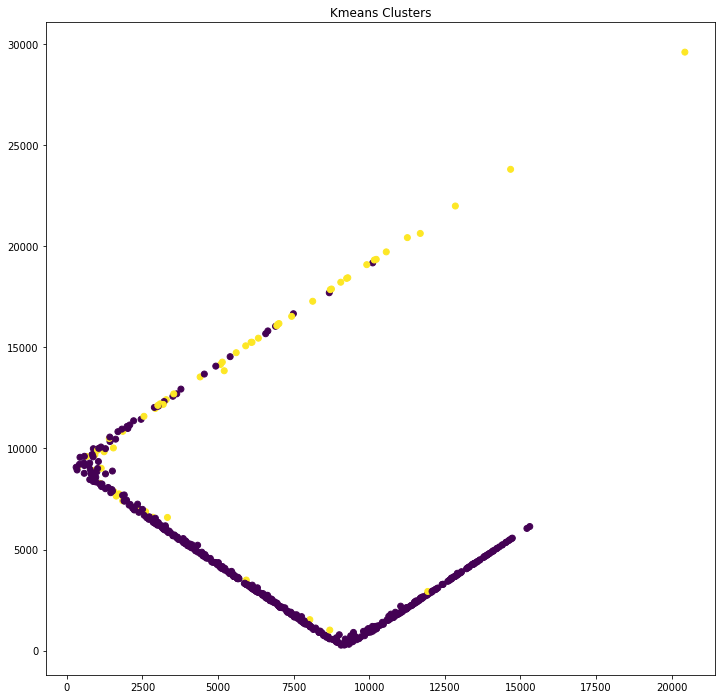

In [238]:
plt.scatter(distances[:,0], distances[:,1], c=labels)
plt.title('Kmeans Clusters')

plt.show()

In [19]:
kmeans_model.cluster_centers_

array([[2.04413655e+02, 1.64409639e+02, 5.27783133e+02, 4.28590361e+02,
        1.62871486e+02, 1.59156627e+01, 9.70836948e+03, 3.13653414e+03,
        1.23190763e+03, 2.20875502e+02, 9.75244980e+02, 1.80412851e+03,
        4.08164659e+00, 3.59277108e+01, 7.97951807e+01, 7.39799197e+01,
        9.50200803e+00, 1.35676827e+04, 5.97911647e+01, 1.46026908e+03,
        3.93373494e+01, 3.00441767e+01, 8.14136546e+01, 1.69116466e+01,
        4.65643373e+01],
       [8.70889423e+01, 8.29495192e+01, 5.26757212e+02, 1.58487981e+02,
        2.82908654e+01, 6.05144231e+01, 4.45260337e+03, 1.45073317e+03,
        6.28007212e+02, 1.34019231e+02, 5.21423077e+02, 9.66454327e+02,
        4.18370192e+00, 3.94783654e+01, 4.35024038e+01, 3.94567308e+01,
        6.62019231e+00, 6.31746154e+03, 1.75576923e+02, 7.02456731e+02,
        3.74591346e+01, 2.84759615e+01, 7.42596154e+01, 1.45937500e+01,
        1.68778846e+01]])

In [239]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import sklearn.cluster as cluster
import umap
import hdbscan

In [133]:
# kmeans_df

,W,L,G,GS,CG,SV,IPouts,H,ER,HR,...,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,Years_Played
7,297,248,578,568,525,3,14868,5601,1573,70,...,253,0.0,3,21997.0,12,3497,0.0,0.0,0.0,15
50,365,310,705,688,646,2,18010,6405,1903,121,...,221,0.0,2,25415.0,19,3352,0.0,0.0,0.0,15
118,342,225,600,594,554,2,15149,4438,1474,75,...,240,0.0,0,20941.0,7,2470,0.0,0.0,0.0,14
125,307,210,565,549,525,4,14406,4588,1447,106,...,274,0.0,1,20308.0,16,2556,0.0,0.0,0.0,13
130,284,220,555,504,468,15,13594,4195,1537,97,...,343,0.0,3,19407.0,52,2523,0.0,0.0,0.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8187,63,55,557,88,2,141,2971,895,433,104,...,46,32.0,0,4199.0,270,458,11.0,27.0,74.0,13
8209,82,83,346,228,9,0,4398,1489,753,220,...,33,47.0,8,6315.0,38,820,39.0,39.0,133.0,13
8237,34,30,670,0,0,244,2012,594,208,39,...,38,24.0,0,2734.0,406,239,6.0,12.0,65.0,13
8273,29,30,561,0,0,32,1517,360,180,34,...,54,37.0,6,2111.0,141,194,15.0,12.0,52.0,13


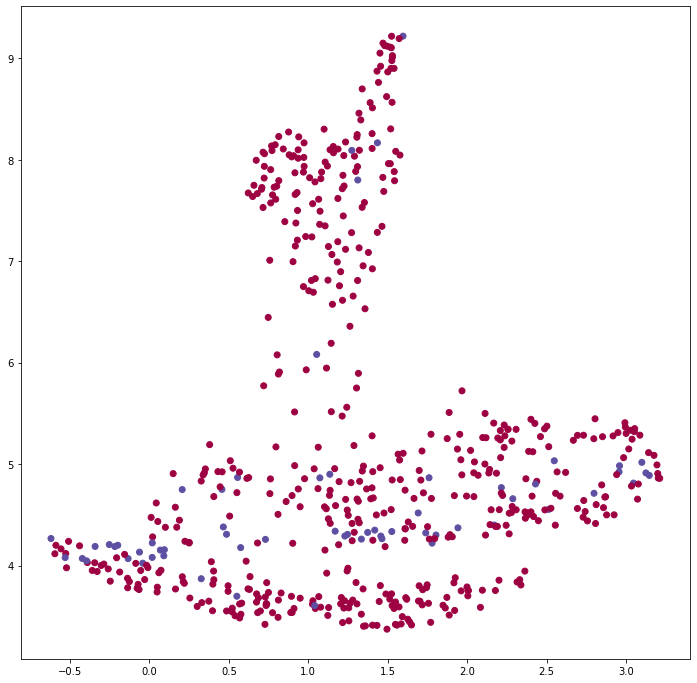

In [327]:

standard_embedding = umap.UMAP( n_neighbors=n, metric='cosine',
    min_dist=0.1,
    n_components=5,
    random_state=42,).fit_transform(kmeans_df)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=labels, cmap='Spectral');


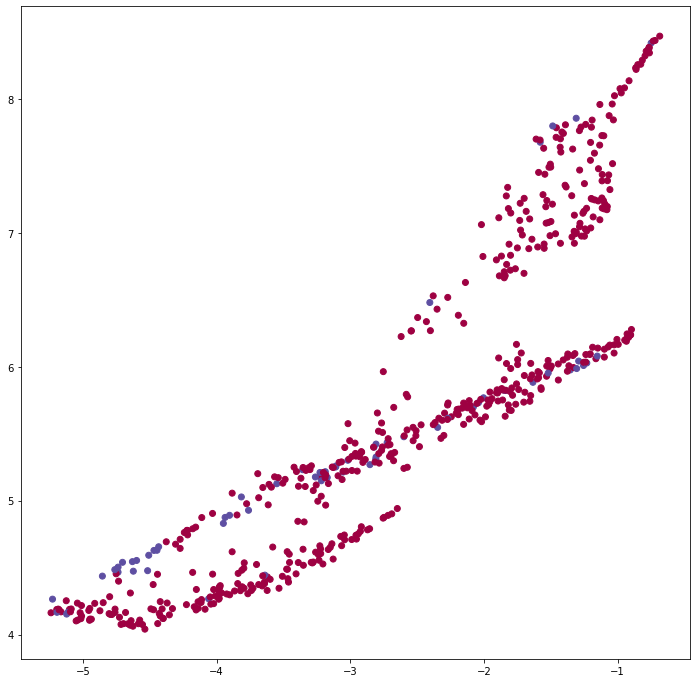

In [241]:

standard_embedding = umap.UMAP( n_neighbors=n, metric='cosine',
    min_dist=0.0,
    n_components=5,
    random_state=42,).fit_transform(kmeans_df)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=labels, cmap='Spectral');


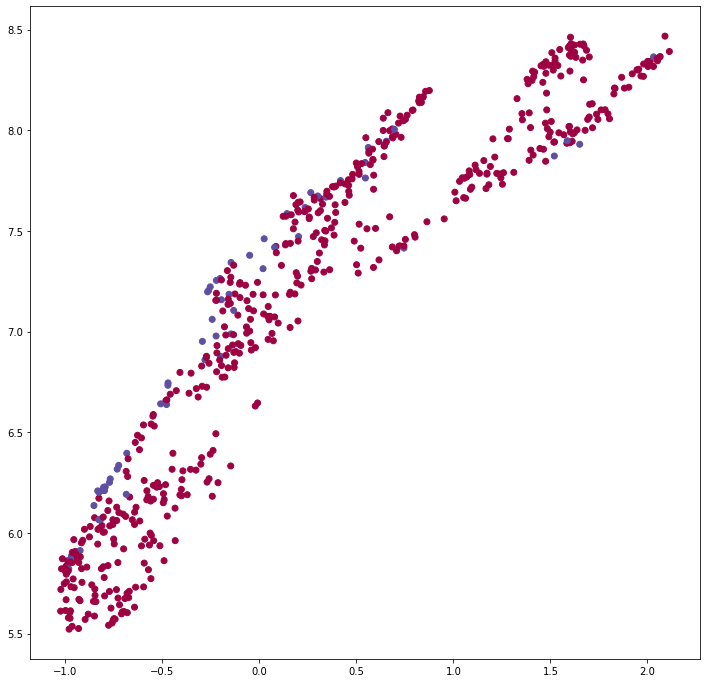

In [242]:

standard_embedding = umap.UMAP( n_neighbors=n, metric='cosine',
    min_dist=0.0,
    n_components=10,
    random_state=42,).fit_transform(kmeans_df)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=labels, cmap='Spectral');


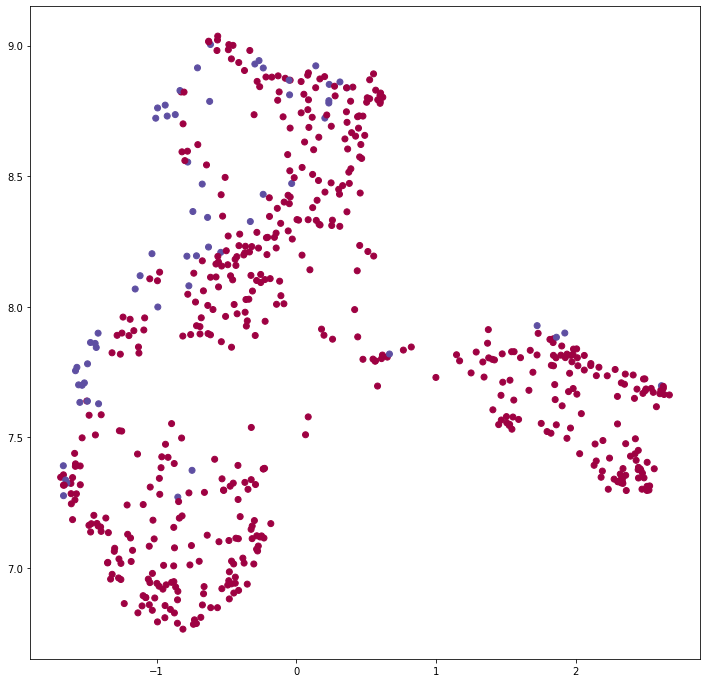

In [243]:

standard_embedding = umap.UMAP( n_neighbors=n, metric='cosine',
    min_dist=0.0,
    n_components=20,
    random_state=42,).fit_transform(kmeans_df)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=labels, cmap='Spectral');


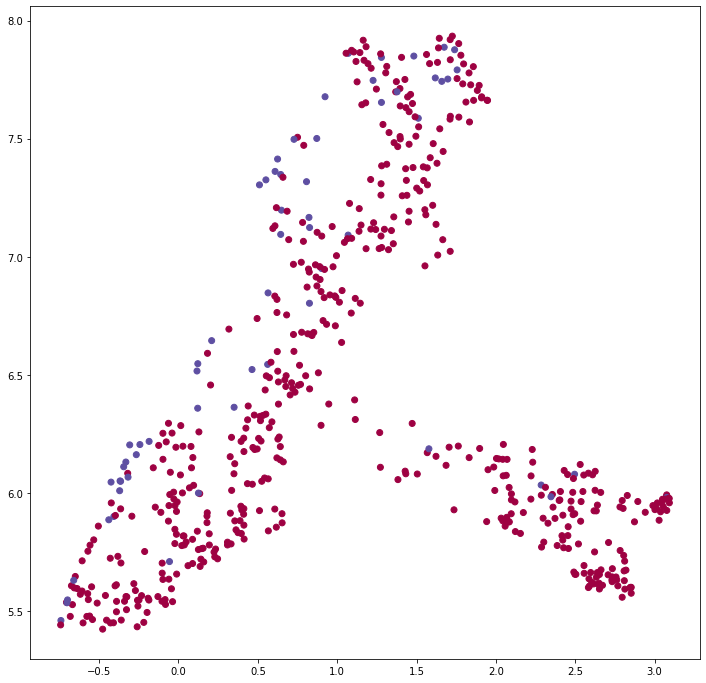

In [244]:

standard_embedding = umap.UMAP( n_neighbors=n, metric='cosine',
    min_dist=0.0,
    n_components=50,
    random_state=42,).fit_transform(kmeans_df)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=labels, cmap='Spectral');


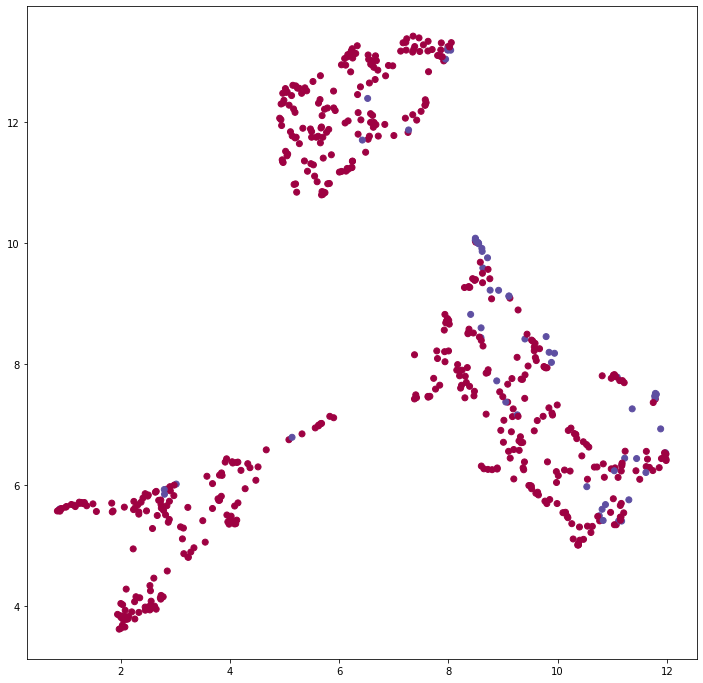

In [329]:

standard_embedding = umap.UMAP( n_neighbors=15, metric='cosine',
    min_dist=0.0,
    n_components=2,
    random_state=42,).fit_transform(kmeans_df)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=labels, cmap='Spectral');


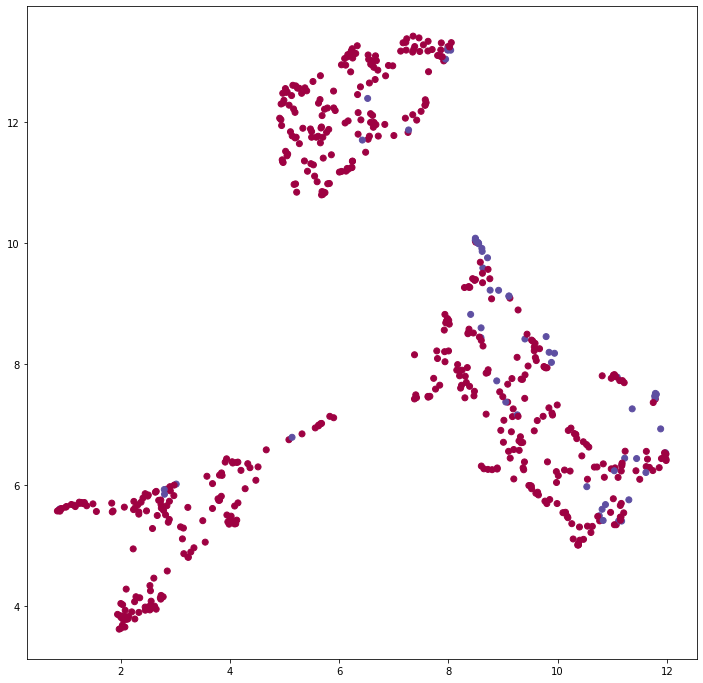

In [335]:

standard_embedding = umap.UMAP( n_neighbors=15, metric='cosine',
    min_dist=0.0,
    n_components=2,
    random_state=42,).fit_transform(kmeans_df)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=labels, cmap='Spectral');


In [334]:
kmeans_df.loc[5116]

W                 245.000
L                 193.000
G                 692.000
GS                562.000
CG                122.000
SV                  8.000
IPouts          11999.000
H                3897.000
ER               1643.000
HR                372.000
BB               1165.000
SO               2149.000
BAOpp               6.353
IBB                71.000
WP                 83.000
HBP               122.000
BK                 30.000
BFP             16754.000
GF                 51.000
R                1835.000
SH                120.000
SF                109.000
GIDP              332.000
Years_Played       23.000
WAR                49.260
Name: 5116, dtype: float64

In [246]:
# !pip3 install plotly

In [127]:
import plotly.express as px

In [142]:
stats_df_war.head()

,playerID,W,L,G,GS,CG,SV,IPouts,H,ER,...,BFP,GF,R,SH,SF,GIDP,Years_Played,HoF,votedBy,WAR
0,bechtge01,7,20,30,27,25,0,729,337,86,...,1197.0,2,265,0.0,0.0,0.0,4,0.0,0,-1.69
1,brainas01,24,53,85,82,77,0,2099,1109,342,...,3625.0,4,917,0.0,0.0,0.0,4,0.0,0,-5.62
2,fergubo01,1,3,11,4,4,0,172,110,36,...,302.0,5,73,0.0,0.0,0.0,6,0.0,0,-1.29
3,fishech01,56,84,165,141,126,3,3978,1547,385,...,6077.0,26,1092,0.0,0.0,0.0,7,0.0,0,18.06
4,fleetfr01,2,6,9,8,7,0,226,136,42,...,398.0,0,105,0.0,0.0,0.0,3,0.0,0,-1.38


In [300]:
stats_df_war_greater_than_13 = stats_df_war[stats_df_war.Years_Played >= 13]
stats_df_war_greater_than_13['TimeFrame'] = None
stats_df_war_greater_than_13['Name'] = None

/var/folders/kv/p5t_m_2511q50z7hfnpz3sk80000gn/T/ipykernel_4534/3710307881.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/kv/p5t_m_2511q50z7hfnpz3sk80000gn/T/ipykernel_4534/3710307881.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [180]:
stats_df_war_greater_than_13.index[stats_df_war_greater_than_13.playerID=='martide01'][

5116

In [307]:
people_df[people_df.playerID == 'martide01'].nameFirst.values[0]

'Dennis'

In [219]:
stats_df_war_greater_than_13.loc[5116, 'TimeFrame']

In [308]:
for player_id in stats_df_war_greater_than_13.playerID.tolist():
    idx = stats_df_war_greater_than_13.index[stats_df_war_greater_than_13.playerID==player_id][0]
    if pd.DatetimeIndex(people_df[people_df.playerID == player_id].finalGame).year[0] < 2017:
        stats_df_war_greater_than_13.loc[idx, 'TimeFrame'] = f"{pd.DatetimeIndex(people_df[people_df.playerID == player_id].debut).year[0]} - {pd.DatetimeIndex(people_df[people_df.playerID == player_id].finalGame).year[0]}"
        stats_df_war_greater_than_13.loc[idx, 'Name'] = f'{people_df[people_df.playerID == player_id].nameFirst.values[0]} {people_df[people_df.playerID == player_id].nameLast.values[0]}'


/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [309]:
stats_df_war_greater_than_13_eligible = stats_df_war_greater_than_13.dropna()

In [310]:
stats_df_war_greater_than_13.head()

,playerID,W,L,G,GS,CG,SV,IPouts,H,ER,HR,BB,SO,BAOpp,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,Years_Played,HoF,votedBy,WAR,TimeFrame,Name
7,mathebo01,297,248,578,568,525,3,14868,5601,1573,70,532,1528,0.0,0.0,253,0.0,3,21997.0,12,3497,0.0,0.0,0.0,15,0.0,0,62.33,1871 - 1887,Bobby Mathews
50,galvipu01,365,310,705,688,646,2,18010,6405,1903,121,745,1807,0.0,0.0,221,0.0,2,25415.0,19,3352,0.0,0.0,0.0,15,1.0,Veterans,83.25,1875 - 1892,Pud Galvin
118,keefeti01,342,225,600,594,554,2,15149,4438,1474,75,1233,2564,0.0,0.0,240,0.0,0,20941.0,7,2470,0.0,0.0,0.0,14,1.0,Veterans,89.14,1880 - 1893,Tim Keefe
125,welchmi01,307,210,565,549,525,4,14406,4588,1447,106,1297,1850,0.0,0.0,274,0.0,1,20308.0,16,2556,0.0,0.0,0.0,13,1.0,Veterans,63.11,1880 - 1892,Mickey Welch
130,mullato01,284,220,555,504,468,15,13594,4195,1537,97,1408,1803,0.0,0.0,343,0.0,3,19407.0,52,2523,0.0,0.0,0.0,13,0.0,0,61.00,1881 - 1894,Tony Mullane


In [293]:
stats_df_war_greater_than_13_eligible.columns

Index(['playerID', 'W', 'L', 'G', 'GS', 'CG', 'SV', 'IPouts', 'H', 'ER', 'HR',
       'BB', 'SO', 'BAOpp', 'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF', 'R', 'SH',
       'SF', 'GIDP', 'Years_Played', 'HoF', 'votedBy', 'WAR', 'TimeFrame',
       'Name'],
      dtype='object')

In [199]:
stats_df_war_greater_than_13[['playerID','TimeFrame']].squeeze()

,playerID,TimeFrame
7,mathebo01,1871 - 1887
50,galvipu01,1875 - 1892
118,keefeti01,1880 - 1893
125,welchmi01,1880 - 1892
130,mullato01,1881 - 1894
...,...,...
8187,daviswa01,2009 - 2021
8209,hollade01,2009 - 2021
8237,melanma01,2009 - 2022
8273,stroppe01,2009 - 2021


In [213]:
temp = stats_df_war_greater_than_13_eligible[['playerID', 'TimeFrame']].set_index('playerID')

In [214]:
temp.head()

,TimeFrame
playerID,
mathebo01,1871 - 1887
galvipu01,1875 - 1892
keefeti01,1880 - 1893
welchmi01,1880 - 1892
mullato01,1881 - 1894


In [321]:
temp = pd.DataFrame(columns = ['description', 'color'])

In [322]:
for idx, val in stats_df_war_greater_than_13_eligible.iterrows():
    color_ = 'blue'
    if val.HoF == 1:
        color_ = 'red'
    if val.playerID == 'martide01':
        color_ = 'green'
#     if val.playerID == 'morrija02':
#         color_ = 'orange'
    temp = temp.append({'description': f'{val.Name} - {val.TimeFrame}',
                       'color': color_}, ignore_index=True)

In [323]:
temp

,description,color
0,Bobby Mathews - 1871 - 1887,blue
1,Pud Galvin - 1875 - 1892,red
2,Tim Keefe - 1880 - 1893,red
3,Mickey Welch - 1880 - 1892,red
4,Tony Mullane - 1881 - 1894,blue
5,Al Maul - 1884 - 1901,blue
6,Adonis Terry - 1884 - 1897,blue
7,Gus Weyhing - 1887 - 1901,blue
8,Kid Nichols - 1890 - 1906,red
9,Cy Young - 1890 - 1911,red


In [336]:
fig_2d = px.scatter(
    standard_embedding, x=0, y=1,
    hover_name=temp.description,
    color=temp.color, 
    
)
fig_2d.update_traces(marker_size=5)

fig_2d.show()

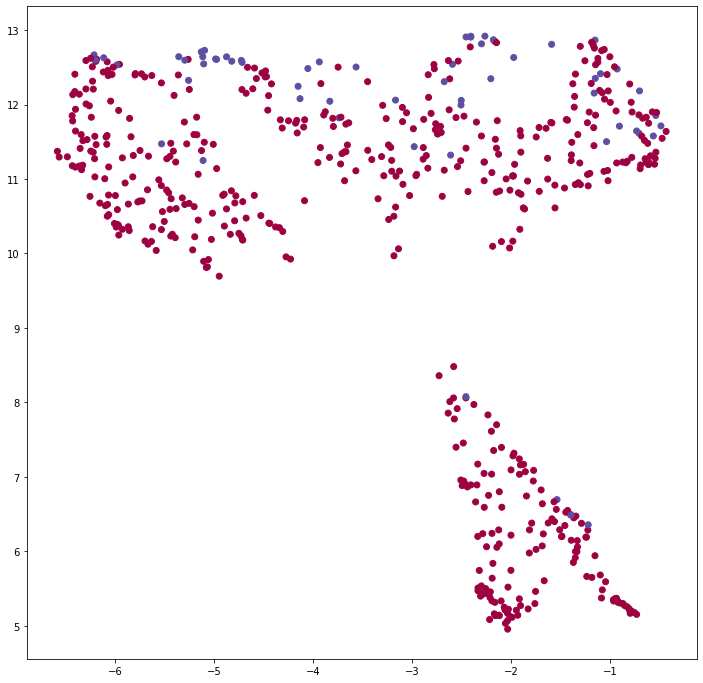

In [249]:

standard_embedding = umap.UMAP( n_neighbors=n, metric='cosine',
    min_dist=0.0,
    n_components=2,
    random_state=42,).fit_transform(kmeans_df)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=labels, cmap='Spectral');


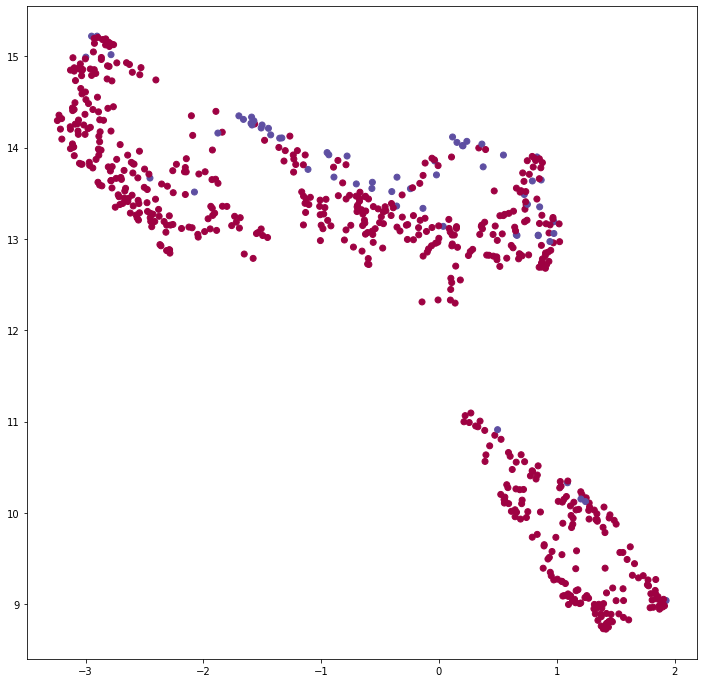

In [132]:
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=labels, cmap='Spectral');

In [155]:
# labels = hdbscan.HDBSCAN(
#     min_samples=10,
#     min_cluster_size=500,
# ).fit_predict(standard_embedding)

In [158]:
# clustered = (labels >= 0)

In [188]:
# plt.scatter(standard_embedding[~clustered, 0],
#             standard_embedding[~clustered, 1],
#             color=(0.5, 0.5, 0.5),
# #             s=0.5,
#             alpha=0.5)
# plt.scatter(standard_embedding[clustered, 0],
#             standard_embedding[clustered, 1],
#             c=labels[clustered],
# #             s=0.5,
#             cmap='Spectral');

In [27]:
import umap.plot

In [213]:
stats_df_war.isnull().sum()

playerID            0
W                   0
L                   0
G                   0
GS                  0
CG                  0
SV                  0
IPouts              0
H                   0
ER                  0
HR                  0
BB                  0
SO                  0
BAOpp            1488
IBB              3873
WP                  0
HBP               338
BK                  0
BFP                 3
GF                  0
R                   0
SH               4730
SF               4730
GIDP             4904
Years_Played        0
HoF                 0
votedBy         10103
WAR               110
dtype: int64

In [65]:
standard_embedding = umap.UMAP(n_neighbors=20, min_dist=0.1, metric='cosine', spread=2).fit(kmeans_df)

In [41]:
stats_df_war.isnull().sum()

playerID        0
W               0
L               0
G               0
GS              0
CG              0
SV              0
IPouts          0
H               0
ER              0
HR              0
BB              0
SO              0
BAOpp           0
IBB             0
WP              0
HBP             0
BK              0
BFP             0
GF              0
R               0
SH              0
SF              0
GIDP            0
Years_Played    0
HoF             0
votedBy         0
WAR             0
dtype: int64

In [43]:
p = umap.plot.interactive(standard_embedding,
                          hover_data=stats_df_war[stats_df_war.Years_Played >= 13], 
                          labels=stats_df_war[stats_df_war.Years_Played >= 13].HoF)
umap.plot.show(p)

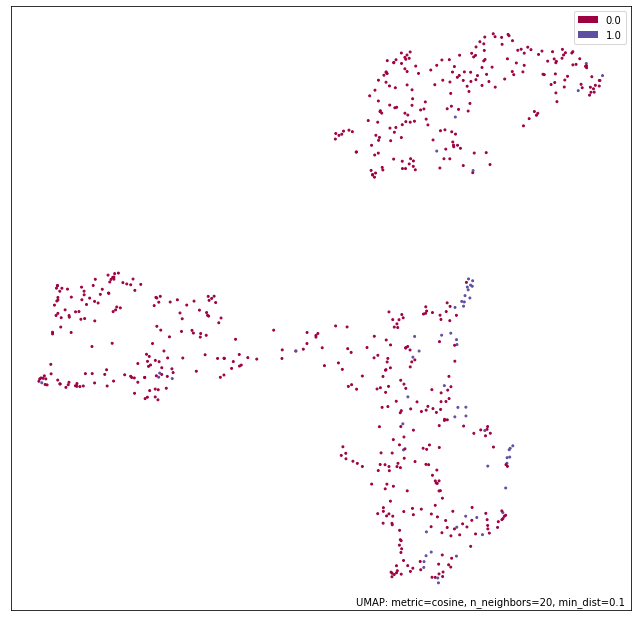

In [66]:
f = umap.plot.points(standard_embedding, labels=stats_df_war[stats_df_war.Years_Played >= 13].HoF)

In [59]:
from bokeh.plotting import show, save, output_notebook, output_file
output_notebook()
# We create a supporting dataframe that will contain labels and     # other information we want to show in the interactive plot
hover_data = pd.DataFrame({'Player':stats_df_war[stats_df_war.Years_Played >= 13].playerID.tolist(),
#                            'Player':stats_df_war[stats_df_war.Years_Played >= 13].playerID.tolist(),
                           'Topic_Number':stats_df_war[stats_df_war.Years_Played >= 13].HoF})
# Finally, we create the plot
p = umap.plot.interactive(standard_embedding, 
                          labels=stats_df_war[stats_df_war.Years_Played >= 13].HoF, 
                          hover_data=hover_data, point_size=4)
show(p)

Loading BokehJS ...

In [70]:
def draw_umap(data ,n_neighbors=15, min_dist=0.1, n_components=2, metric='cosine', title=''):
    fit_ = umap.UMAP(n_neighbors=n_neighbors, 
                    min_dist=min_dist, 
                    n_components=2, 
                    metric=metric)
    u = fit_.fit(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=data)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=data)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], c=data, s=100)
    plt.title(title, fontsize=18)

In [71]:
for n in (2, 5, 10, 20, 50, 100, 200):
    draw_umap(standard_embedding, n_neighbors=n, title='n_neighbors = {}'.format(n))

TypeError: float() argument must be a string or a number, not 'UMAP'

# Statcast

In [3]:
from pybaseball import playerid_lookup
from pybaseball import statcast_pitcher

In [4]:
# playerid_lookup('martinez', 'dennis')

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,martinez,dennis,118371,martd001,martide01,1008161,1976.0,1998.0


In [11]:
# dmartinez_stats = statcast_pitcher('1991-04-01', '1991-11-01', 118371)

Gathering Player Data


In [13]:
# dmartinez_stats.head(10)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,NaN,1991-09-23,NaN,NaN,NaN,"Martinez, Dennis",115222,118371,hit_by_pitch,hit_by_pitch,...,0,0,6,6,0,NaN,NaN,NaN,0.001,0.157
1,NaN,1991-09-23,NaN,NaN,NaN,"Martinez, Dennis",115222,118371,NaN,swinging_strike,...,0,0,6,6,0,NaN,NaN,NaN,0.000,-0.049
2,NaN,1991-09-23,NaN,NaN,NaN,"Martinez, Dennis",115222,118371,NaN,ball,...,0,0,6,6,0,NaN,NaN,NaN,0.000,0.027
3,NaN,1991-09-23,NaN,NaN,NaN,"Martinez, Dennis",124755,118371,double,hit_into_play,...,0,0,6,6,0,NaN,NaN,NaN,0.094,2.269
4,NaN,1991-09-23,NaN,NaN,NaN,"Martinez, Dennis",124755,118371,NaN,called_strike,...,0,0,3,3,0,NaN,NaN,NaN,0.000,-0.109
5,NaN,1991-09-23,NaN,NaN,NaN,"Martinez, Dennis",122439,118371,field_error,hit_into_play,...,0,0,3,3,0,NaN,NaN,NaN,0.011,0.754
6,NaN,1991-09-23,NaN,NaN,NaN,"Martinez, Dennis",122439,118371,NaN,ball,...,0,0,3,3,0,NaN,NaN,NaN,0.000,0.075
7,NaN,1991-09-23,NaN,NaN,NaN,"Martinez, Dennis",122439,118371,NaN,foul,...,0,0,3,3,0,NaN,NaN,NaN,0.000,-0.103
8,NaN,1991-09-23,NaN,NaN,NaN,"Martinez, Dennis",122439,118371,NaN,ball,...,0,0,3,3,0,NaN,NaN,NaN,0.000,0.039
9,NaN,1991-09-23,NaN,NaN,NaN,"Martinez, Dennis",122439,118371,NaN,called_strike,...,0,0,3,3,0,NaN,NaN,NaN,0.000,-0.064
